In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

link = 'https://gist.github.com/robblack007/eca03fa9f7586860235d/raw/ef05a2f29febc94a9c9f99ca20fd0b65e74ed451/custom.css'
display_html(urlopen(link).read(), raw=True)

# Dinámica de un robot manipulador planar

In [2]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, pi, trigsimp, dsolve, sinh, cosh, simplify
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [3]:
var("m1 m2 J1 J2 l1 l2 t g")

In [4]:
q1 = Function("q1")(t)
q2 = Function("q2")(t)

In [5]:
x1 = l1*cos(q1)
y1 = l1*sin(q1)
v1 = x1.diff("t")**2 + y1.diff("t")**2
v1.trigsimp()

In [6]:
x2 = l1*cos(q1) + l2*cos(q1 + q2)
y2 = l1*sin(q1) + l2*sin(q1 + q2)
v2 = x2.diff("t")**2 + y2.diff("t")**2
v2.trigsimp()

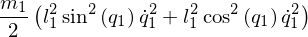

In [7]:
K1 = Rational(1, 2)*m1*v1
K1

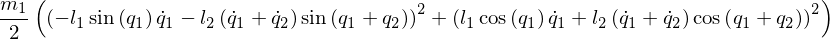

In [8]:
K2 = Rational(1, 2)*m1*v2
K2

In [9]:
U1 = m1*g*y1
U1

In [10]:
U2 = m2*g*y2
U2

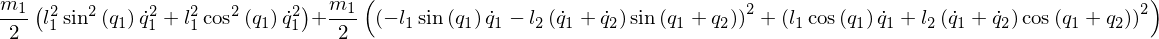

In [11]:
K = K1 + K2
K

In [12]:
U = U1 + U2
U

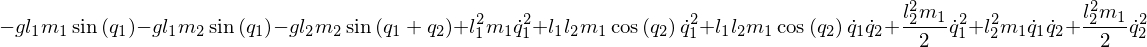

In [13]:
L = (K - U).expand().simplify()
L

In [14]:
τ1 = (L.diff(q1.diff(t)).diff(t) - L.diff(q1)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [15]:
τ2 = (L.diff(q2.diff(t)).diff(t) - L.diff(q2)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [16]:
τ1

In [17]:
τ2

In [18]:
from scipy.integrate import odeint
from numpy import linspace

In [27]:
def pendulo_doble(estado, tiempo):
    # Se importan funciones necesarias
    from numpy import sin, cos, matrix
    # Se desenvuelven variables del estado y tiempo
    q1, q2, q̇1, q̇2 = estado
    t = tiempo
    
    # Se declaran constantes del sistema
    m1, m2 = 1, 1
    l1, l2 = 1, 1
    g = 9.81
    
    # Se declaran constantes del control
    kp1, kp2 = -30, -60
    kv1, kv2 = -20, -20
    
    # Señales de control nulas
    #tau1, tau2 = 0, 0
    
    # Posiciones a alcanzar
    qd1, qd2 = 1, 1
    
    # Se declaran señales de control del sistema
    tau1 = kp1*(q1 - qd1) + kv1*q̇1
    tau2 = kp2*(q2 - qd2) + kv2*q̇2
    
    # Se calculan algunos terminos comunes
    ϕ1 = m1*l1**2
    ϕ2 = m1*l1*l2
    ϕ3 = m1*l2**2
    
    # Se calculan las matrices de masas, Coriolis,
    # y vectores de gravedad, control, posicion y velocidad
    M = matrix([[2*ϕ1 + 2*ϕ2*cos(q2) + ϕ3, ϕ2*cos(q2) + ϕ3],
                [ϕ2*cos(q2) + ϕ3, ϕ3]])
    C = matrix([[-2*ϕ2*sin(q2)*q̇2, -ϕ2*sin(q2)*q̇2], [ϕ2*sin(q2)*q̇1, 0]])
    G = matrix([[m1*l1*cos(q1) + m2*l1*cos(q1) + m2*l2*cos(q1 + q2)], [m2*l2*cos(q1 + q2)]])
    Tau = matrix([[tau1], [tau2]])
    q = matrix([[q1], [q2]])
    q̇ = matrix([[q̇1], [q̇2]])
    
    # Se calcula la derivada del estado del sistema
    qp1 = q̇1
    qp2 = q̇2
    
    qpp = M.I*(Tau - C*q̇ - G)
    qpp1, qpp2 = qpp.tolist()
    
    return [qp1, qp2, qpp1[0], qpp2[0]]

In [28]:
t = linspace(0, 30, 500)
estados_simulados = odeint(func = pendulo_doble, y0  = [0, 0, 0, 0], t = t)

In [29]:
q1, q2, q̇1, q̇2 = list(zip(*estados_simulados.tolist()))

In [30]:
%matplotlib notebook
from matplotlib.pyplot import plot, style, figure
from mpl_toolkits.mplot3d import Axes3D
style.use("ggplot")

<IPython.core.display.Javascript object>


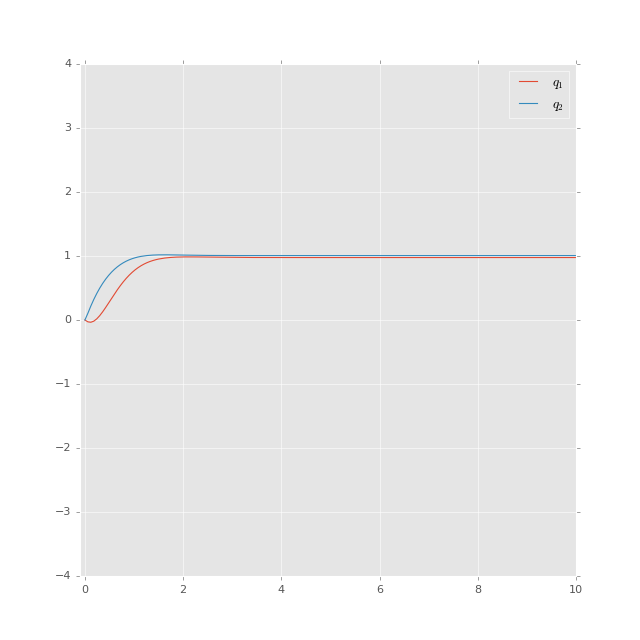

In [31]:
fig1 = figure(figsize=(8, 8))

ax1 = fig1.gca()

p1, = ax1.plot(t, q1)
p2, = ax1.plot(t, q2)
ax1.legend([p1, p2],[r"$q_1$", r"$q_2$"])
ax1.set_ylim(-4, 4)
ax1.set_xlim(-0.1, 10);

In [32]:
%matplotlib inline
from matplotlib import animation
from numpy import sin, cos, arange

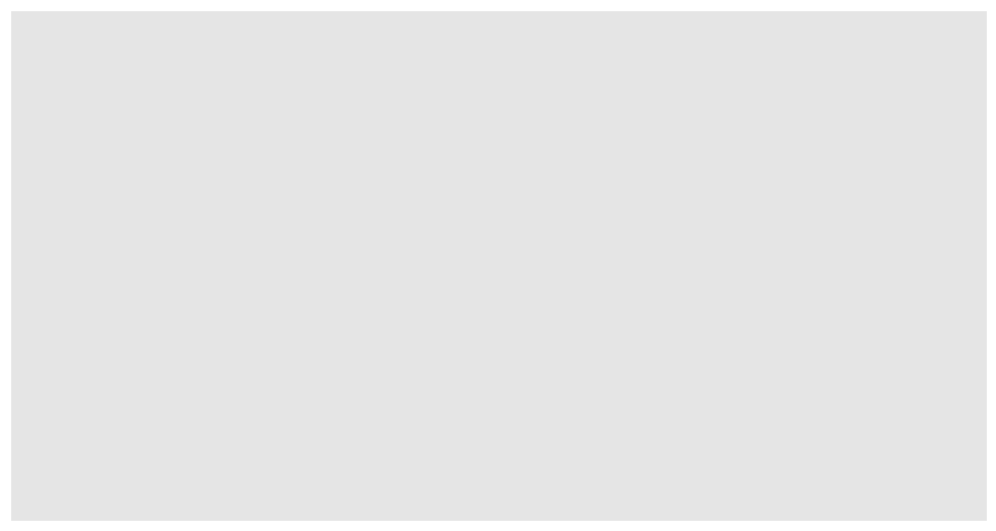

In [34]:
l1, l2 = 1, 1
# Se define el tamaño de la figura
fig = figure(figsize=(12.6, 6.6))

# Se define una sola grafica en la figura y se dan los limites de los ejes x y y
axi = fig.add_subplot(111, autoscale_on=False, xlim=(-2.1, 2.1), ylim=(-2.1, 2.1))
axi.set_xticklabels([])
axi.set_yticklabels([])
axi.axes.get_xaxis().set_visible(False)
axi.axes.get_yaxis().set_visible(False)

# Se utilizan graficas de linea para el eslabon del pendulo
linea, = axi.plot([], [], "-o", lw=2, color='gray')

def init():
    # Esta funcion se ejecuta una sola vez y sirve para inicializar el sistema
    linea.set_data([], [])
    return linea

def animate(i):
    # Esta funcion se ejecuta para cada cuadro del GIF
    
    # Se obtienen las coordenadas x y y para el eslabon
    xs, ys = [[0, l1*cos(q1[i]), l1*cos(q1[i]) + l2*cos(q1[i]+q2[i])],
              [0, l1*sin(q1[i]), l1*sin(q1[i]) + l2*sin(q1[i]+q2[i])]]
    linea.set_data(xs, ys)
    
    return linea

# Se hace la animacion dandole el nombre de la figura definida al principio, la funcion que
# se debe ejecutar para cada cuadro, el numero de cuadros que se debe de hacer, el periodo 
# de cada cuadro y la funcion inicial
ani = animation.FuncAnimation(fig, animate, arange(1, len(q1)),
                              interval=25, init_func=init)

# Se guarda el GIF en el archivo indicado
ani.save('./imagenes/simulacion-doble.gif', writer='imagemagick');

![](./imagenes/simulacion-doble.gif)